In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('divorce.csv')
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
df.shape

(170, 55)

In [4]:
df.isnull().sum()

Sorry_end                        0
Ignore_diff                      0
begin_correct                    0
Contact                          0
Special_time                     0
No_home_time                     0
2_strangers                      0
enjoy_holiday                    0
enjoy_travel                     0
common_goals                     0
harmony                          0
freeom_value                     0
entertain                        0
people_goals                     0
dreams                           0
love                             0
happy                            0
marriage                         0
roles                            0
trust                            0
likes                            0
care_sick                        0
fav_food                         0
stresses                         0
inner_world                      0
anxieties                        0
current_stress                   0
hopes_wishes                     0
know_well           

In [5]:
df.Divorce_Y_N.value_counts()

0    86
1    84
Name: Divorce_Y_N, dtype: int64

<AxesSubplot:xlabel='Divorce_Y_N', ylabel='count'>

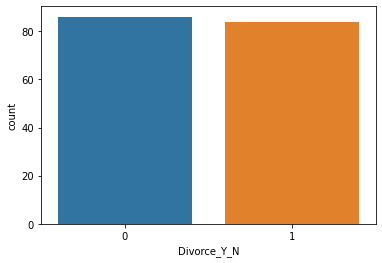

In [6]:
sns.countplot(x='Divorce_Y_N', data=df)

In [7]:
pwd = os.getcwd()
with open(pwd + '\\Divorce_README.txt') as file:
    lines = file.readlines()
    lines = [line.rstrip() for line in lines]

que = [x.split('\t')[1] for x in lines[2:]]
que[:5]

# Descriptive statistics
values = dict()
que_cols = df.drop('Divorce_Y_N',axis=1).columns
for c in que_cols:
    values[c] = dict(round(df[c].value_counts(normalize=True)*100,2))
    
que_rate_df = pd.DataFrame(values).rename(columns=dict(zip(que_cols,que))).T
que_rate_df = que_rate_df[range(5)]

print(" -> Orange highlighted cells indicates the max percentage of people given that rating")
print(" -> Green highlighted cells indicates the min percentage of people given that rating")
# Highlighting the max & min value
que_rate_df.style\
      .format('{:.1f}%')\
      .highlight_max(color = 'orange',axis=1)\
      .highlight_min(color = 'green',axis=1)

 -> Orange highlighted cells indicates the max percentage of people given that rating
 -> Green highlighted cells indicates the min percentage of people given that rating


,0,1,2,3,4
"If one of us apologizes when our discussion deteriorates, the discussion ends.",40.6%,5.3%,8.2%,27.6%,18.2%
"I know we can ignore our differences, even if things get hard sometimes.",34.7%,13.5%,16.5%,22.4%,12.9%
"When we need it, we can take our discussions with my spouse from the beginning and correct it.",30.0%,14.1%,15.3%,30.6%,10.0%
"When I discuss with my spouse, to contact him will eventually work.",44.1%,7.1%,17.6%,18.8%,12.3%
The time I spent with my wife is special for us.,48.2%,5.9%,4.7%,25.9%,15.3%
We don't have time at home as partners.,50.6%,28.8%,17.1%,2.4%,1.2%
We are like two strangers who share the same environment at home rather than family.,67.1%,24.7%,2.9%,2.4%,2.9%
I enjoy our holidays with my wife.,47.6%,5.9%,12.3%,21.8%,12.3%
I enjoy traveling with my wife.,49.4%,4.1%,7.7%,28.8%,10.0%
Most of our goals are common to my spouse.,36.5%,10.6%,22.4%,20.0%,10.6%


Text(0.5, 1.0, 'Correlation value between ratings given for questions')

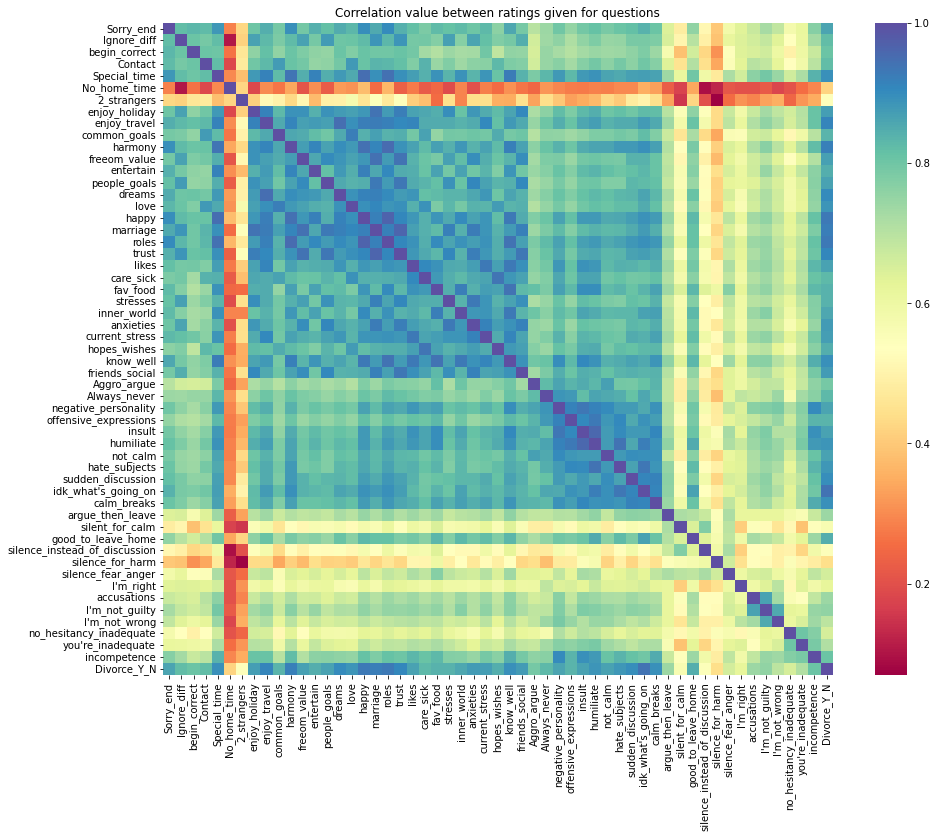

In [8]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),cmap='Spectral')
plt.title("Correlation value between ratings given for questions")

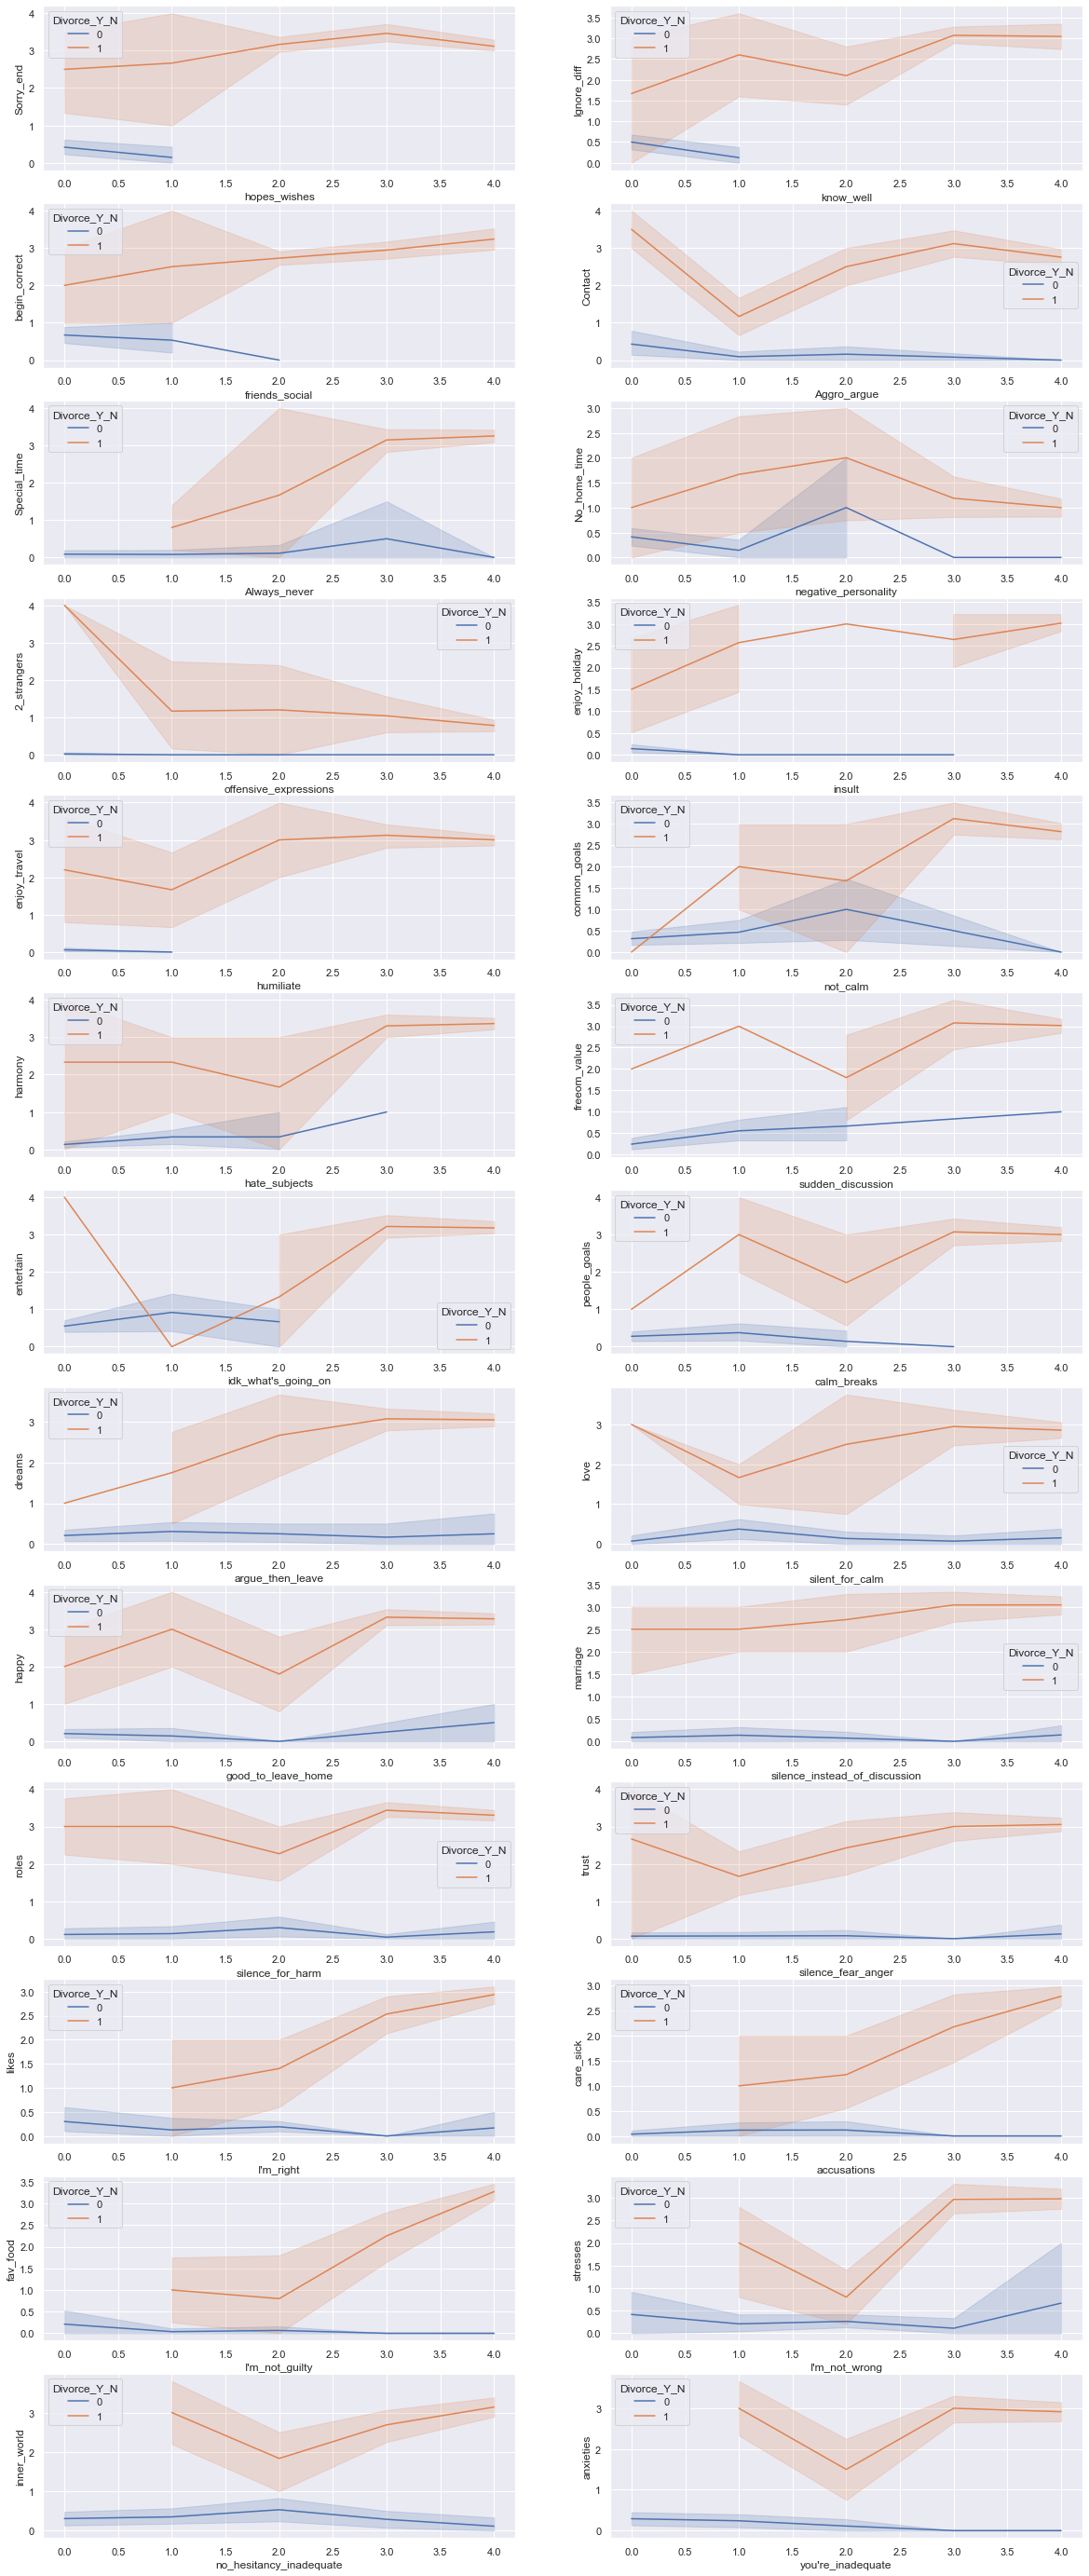

In [9]:
col_names = df.drop('Divorce_Y_N',axis=1).columns
sns.set(rc={'figure.figsize':(20,50)})
for i, column in enumerate(col_names[:26], 1):
    x=col_names[i+26]
    plt.subplot(13,2,i)
    p=sns.lineplot(hue='Divorce_Y_N',x=x,y=column,data=df,color='blue')

In [10]:
X = df.drop(['Divorce_Y_N'], axis=1)
Y = df['Divorce_Y_N']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [12]:
def models(X_train, Y_train):
    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    logreg = LogisticRegression(random_state=0)
    logreg.fit(X_train, Y_train)

    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators=10, criterion='gini', random_state=0)
    rf.fit(X_train, Y_train)

    #KNN
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
    knn.fit(X_train, Y_train)

    #Return the models
    return logreg, rf, knn

In [13]:
logreg, rf, knn = models(X_train, Y_train)
models = [logreg, rf, knn]

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

for model in models:
    print(model)
    Y_pred = model.predict(X_test)
    print('Confusion Matrix:')
    print(confusion_matrix(Y_test, Y_pred))
    print('Classification Report:')
    print(classification_report(Y_test, Y_pred))
    print('-----------------------------------------------------')

LogisticRegression(random_state=0)
Confusion Matrix:
[[28  0]
 [ 0 29]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        29

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

-----------------------------------------------------
RandomForestClassifier(n_estimators=10, random_state=0)
Confusion Matrix:
[[28  0]
 [ 1 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.97      0.98        29

    accuracy                           0.98        57
   macro avg       0.98      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57

-----------------------------------------------------
KNeighborsClassifier(n_neig